### Expand 2.5 studies to include 2020 data, and clean all datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### Read in 1999, 2012, and 2020 PM2.5 dataset
pm0 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_1999.csv') 
pm1 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2012.csv') 
pm2 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2020.csv') 

### Exploratory data analysis on 2020 dataset

In [3]:
#print summary info for the 2020 dataset as it wasn't done in the first PM2.5 studies notebook
print(pm2.info())
print(pm2.ndim) 
print(pm2.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554830 entries, 0 to 554829
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           554830 non-null  int64  
 1   County Code          554830 non-null  int64  
 2   Site Num             554830 non-null  int64  
 3   Parameter Code       554830 non-null  int64  
 4   POC                  554830 non-null  int64  
 5   Latitude             554830 non-null  float64
 6   Longitude            554830 non-null  float64
 7   Datum                554830 non-null  object 
 8   Parameter Name       554830 non-null  object 
 9   Sample Duration      554830 non-null  object 
 10  Pollutant Standard   311371 non-null  object 
 11  Date Local           554830 non-null  object 
 12  Units of Measure     554830 non-null  object 
 13  Event Type           554830 non-null  object 
 14  Observation Count    554830 non-null  int64  
 15  Observation Perce

In [4]:
pm2['Arithmetic Mean'].describe()

count    554830.000000
mean          8.159036
std          10.625555
min          -5.000000
25%           4.300000
50%           6.500000
75%           9.500000
max         824.104167
Name: Arithmetic Mean, dtype: float64

### Look more closely into negative values

Since values should seemingly <b>not</b> be negative, I contacted the EPA via email to understand the negative values. I received this response: 

"Thanks for your message and reaching out. We have a short write up on acceptable values in EPA's Air Quality System (AQS) here: https://aqs.epa.gov/aqsweb/documents/about_aqs_data.html#_acceptable_values, but since that explanation is very short I can elaborate.

Every instrument has an allowable uncertainty, and occasionally as you've noted monitors can yield small negative hourly values. Say it's +/- 10 ppb for whatever substance. If the instrument reads 100 ppb, that means the real concentration will be somewhere between 90 and 110. If the instrument reads -3 that means the real value can be anywhere between 0 and 7 (negative concentrations not being possible). We allow reporting of the negative values to capture valid, quality assured readings that are valid members of the sample set. With PM2.5 monitors, negative hourly concentrations for PM2.5 down to -4.99 ug/m3 (the default QC range check) are used in computing 24-hour averages so as not to bias that average."

In [5]:
#Look into negative values in the 2012 dataset
pm1LessThan0 = pm1[pm1['Arithmetic Mean'] < 0]
pm1LessThan0

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
4018,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4042,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4063,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4065,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
4175,2,20,1004,88101,3,61.326700,-149.569707,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,PARKGATE/EAGLE RIVER,11723 OLD GLENN HIGHWAY,Alaska,Anchorage,Anchorage,"Anchorage, AK",2014-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275005,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30
275006,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30
275012,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30
275063,56,35,700,88101,1,42.486361,-110.098861,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Big Piney Site #3,Big Piney Site #3,Wyoming,Sublette,Not in a city,NaN,2014-06-30


In [6]:
#Look into negative values in the 2012 dataset
pm2LessThan0 = pm2[pm2['Arithmetic Mean'] < 0]
pm2LessThan0

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
3809,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
3816,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
4163,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
4170,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,GARDEN/TRINITY CHRISTIAN CHURCH,3000 EAST 16TH AVENUE,Alaska,Anchorage,Anchorage,"Anchorage, AK",2021-03-18
5564,2,110,4,88101,3,58.388497,-134.567237,WGS84,PM2.5 - Local Conditions,1 HOUR,...,NaN,170.0,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Floyd Dryden Middle School,3800 MENDENHALL LOOP ROAD,Alaska,Juneau,Juneau,"Juneau, AK",2021-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553629,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16
553633,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16
553634,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16
553635,56,39,1013,88101,1,44.373056,-110.830833,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,0.0,NaN,-,Yellowstone National Park - Old Faithful Snow ...,Yellowstone National Park - Old Faithful Snow ...,Wyoming,Teton,Not in a city,"Jackson, WY-ID",2021-02-16


The 2012 dataset has 1130 negative sample values and the 2020 dataset has 2755 negative sample values

In [7]:
#sample duration stands out
print(pm1LessThan0.groupby('Sample Duration').size())
print(pm2LessThan0.groupby('Sample Duration').size())

Sample Duration
1 HOUR           606
24-HR BLK AVG    524
dtype: int64
Sample Duration
1 HOUR           1481
24-HR BLK AVG    1274
dtype: int64


In [8]:
#look at sample durations for all datasets
pm0SampleDuration = pm0.groupby('Sample Duration').size()
pm1SampleDuration = pm1.groupby('Sample Duration').size()
pm2SampleDuration = pm2.groupby('Sample Duration').size()
print(pm0SampleDuration)
print(pm1SampleDuration)
print(pm2SampleDuration)

Sample Duration
24 HOUR    103210
dtype: int64
Sample Duration
1 HOUR            85670
24 HOUR          107843
24-HR BLK AVG     83158
dtype: int64
Sample Duration
1 HOUR           243459
24 HOUR           72055
24-HR BLK AVG    239316
dtype: int64


The negative values in the 2012 and 2020 datasets were either 1 hour or 24-hour block averages. 

Text(0.5, 1.0, 'PM 2.5 Sample Durations by Dataset')

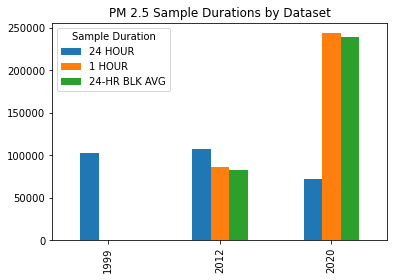

In [9]:
#Show bar chart of types of sample durations in 1999, 2012, and 2020
concatenatedSampleDurations = pd.concat([pm0SampleDuration, pm1SampleDuration, pm2SampleDuration], axis = 1, keys = ['1999', '2012', '2020'])
transposedSampleDurations = concatenatedSampleDurations.transpose()
fig = plt.figure
transposedSampleDurations.plot(kind = 'bar')
plt.title('PM 2.5 Sample Durations by Dataset')

In [10]:
plt.close()

It is clear that the trend is moving away from reporting of 24 hour samples only. Particularly in 2020, the number of 24 hour samples is far smaller than the number of 1 hour and 24-hour block average samples. Looking at the csv files, sites routinely had both 1 hour samples and 24-hr block averages on the same day. 

### Cleaning datasets

While looking at the csv file for the 2012 PM 2.5 data, I noticed there were results included for non U.S. states. 
Also, after re-reading the datafile descriptions, I will check whether there are any results for
excluded events. Thus, cleaning of datasets will include (1) removal of all 1 hour samples, (2) removal of excluded event observations, (3) removal of 24-hour block averages when a site reports both 24-hour block average and 24 hour concentrations on the same date, and (4) removal of non U.S. states.

#### 1999 dataset

In [11]:
#Check whether there are excluded observations in event type
pm0.groupby('Event Type').size()

Event Type
Included       597
None        102613
dtype: int64

In [12]:
#check for state codes of 80 or CC (Country of Mexico or Canada) in pm0 
print(np.count_nonzero(pm0['State Code']== '80' ))
print(np.count_nonzero(pm0['State Code']== 80 ))
print(np.count_nonzero(pm0['State Code']== 'CC' ))

0
0
0


The other categories of cleaning do not apply to the 1999 dataset. No cleaning required.

#### 2012 dataset

In [13]:
#remove 1 hour samples from 2012 dataset
pm1Non1HR = pm1[pm1['Sample Duration'] !=  '1 HOUR']
pm1Non1HR

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,38.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,27.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,24.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276666,78,10,12,88101,2,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,9.0,116.0,BGI Model PQ200 PM2.5 Sampler w/WINS - GRAVIME...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2019-06-13
276667,78,10,12,88101,2,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,13.0,116.0,BGI Model PQ200 PM2.5 Sampler w/WINS - GRAVIME...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2019-06-13
276668,78,10,12,88101,2,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,10.0,116.0,BGI Model PQ200 PM2.5 Sampler w/WINS - GRAVIME...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2019-06-13
276669,78,10,12,88101,2,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,8.0,116.0,BGI Model PQ200 PM2.5 Sampler w/WINS - GRAVIME...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2019-06-13


In [14]:
#remove excluded observations
pm1Non1HrNonExcluded = pm1Non1HR[pm1Non1HR['Event Type'] !=  'Excluded']
pm1Non1HrNonExcluded

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,38.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,27.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,24.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276666,78,10,12,88101,2,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,9.0,116.0,BGI Model PQ200 PM2.5 Sampler w/WINS - GRAVIME...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2019-06-13
276667,78,10,12,88101,2,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,13.0,116.0,BGI Model PQ200 PM2.5 Sampler w/WINS - GRAVIME...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2019-06-13
276668,78,10,12,88101,2,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,10.0,116.0,BGI Model PQ200 PM2.5 Sampler w/WINS - GRAVIME...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2019-06-13
276669,78,10,12,88101,2,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,8.0,116.0,BGI Model PQ200 PM2.5 Sampler w/WINS - GRAVIME...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2019-06-13


In [15]:
pm1Non1HrNonExcludedSorted = pm1Non1HrNonExcluded.sort_values(by=['State Code', 'County Code', 'Site Num', 'Date Local'])
pm1Non1HrNonExcludedSorted

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,38.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,27.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,24.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276669,78,10,12,88101,2,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,8.0,116.0,BGI Model PQ200 PM2.5 Sampler w/WINS - GRAVIME...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2019-06-13
276651,78,10,12,88101,1,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,10.0,142.0,BGI Models PQ200-VSCC or PQ200A-VSCC - Gravime...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2020-02-26
276652,78,10,12,88101,1,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,8.0,142.0,BGI Models PQ200-VSCC or PQ200A-VSCC - Gravime...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2020-02-26
276670,78,10,12,88101,2,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,14.0,116.0,BGI Model PQ200 PM2.5 Sampler w/WINS - GRAVIME...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2019-06-13


In [16]:
pm1Cleaned = pm1Non1HrNonExcludedSorted.drop_duplicates(subset=['State Code', 'County Code','Site Num', 'Date Local'],
            keep='first')
pm1Cleaned

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,28.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,38.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,27.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,29.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,24.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2014-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276649,78,10,12,88101,1,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,7.0,142.0,BGI Models PQ200-VSCC or PQ200A-VSCC - Gravime...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2020-02-26
276650,78,10,12,88101,1,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,11.0,142.0,BGI Models PQ200-VSCC or PQ200A-VSCC - Gravime...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2020-02-26
276651,78,10,12,88101,1,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,10.0,142.0,BGI Models PQ200-VSCC or PQ200A-VSCC - Gravime...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2020-02-26
276652,78,10,12,88101,1,17.712474,-64.784868,WGS84,PM2.5 - Local Conditions,24 HOUR,...,8.0,142.0,BGI Models PQ200-VSCC or PQ200A-VSCC - Gravime...,NaN,BETHLEHEM VILLAGE HOUSING MGMT OFFICE,Virgin Islands,St Croix,Not in a city,NaN,2020-02-26


In [17]:
#check for state codes of 80 or CC (Country of Mexico or Canada) in pm1Cleaned
print(np.count_nonzero(pm1Cleaned['State Code']== '80' ))
print(np.count_nonzero(pm1Cleaned['State Code']== 80 ))
print(np.count_nonzero(pm1Cleaned['State Code']== 'CC' ))

0
0
0


In [18]:
#save cleaned dataset 
pm1Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2012_cleaned.csv', header = True)

#### 2020 dataset

In [19]:
#remove 1 hour samples from 2020 dataset
pm2Non1HR = pm2[pm2['Sample Duration'] !=  '1 HOUR']

In [20]:
#remove excluded observations
pm2Non1HrNonExcluded = pm2Non1HR[pm2Non1HR['Event Type'] !=  'Excluded']

In [21]:
#sort by state, county, site number, and date
pm2Non1HrNonExcludedSorted = pm2Non1HrNonExcluded.sort_values(by=['State Code', 'County Code', 'Site Num', 'Date Local'])

In [22]:
#where duplicate dates occur for a given state code, county code, and site number, keep the first observation (24 hour)
pm2Cleaned = pm2Non1HrNonExcludedSorted.drop_duplicates(subset=['State Code', 'County Code','Site Num', 'Date Local'], keep='first')

In [23]:
#check for state codes of 80 or CC (Country of Mexico or Canada) in pm2Cleaned
print(np.count_nonzero(pm2Cleaned['State Code']== '80' ))
print(np.count_nonzero(pm2Cleaned['State Code']== 80))
print(np.count_nonzero(pm2Cleaned['State Code']== 'CC' ))

0
180
0


In [24]:
#remove observations with state codes of 80
pm2ReCleaned = pm2Cleaned[pm2Cleaned['State Code']!= 80]

In [25]:
#save cleaned csv
pm2ReCleaned.to_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2020_recleaned.csv', header = True)

### Extract arithmetic mean columns from datasets and print descriptive statistics

In [26]:
x0 = pm0['Arithmetic Mean']
x0.describe()

count    103210.000000
mean         13.776391
std           9.425582
min           0.000000
25%           7.200000
50%          11.500000
75%          17.900000
max         157.100000
Name: Arithmetic Mean, dtype: float64

In [27]:
x1 = pm1Cleaned['Arithmetic Mean']
x1.describe()

count    165133.000000
mean          9.078237
std           6.255141
min          -3.500000
25%           5.200000
50%           7.900000
75%          11.600000
max         236.200000
Name: Arithmetic Mean, dtype: float64

In [28]:
x2 = pm2ReCleaned['Arithmetic Mean']
x2.describe()

count    263211.000000
mean          8.083709
std          10.699326
min          -4.900000
25%           4.300000
50%           6.500000
75%           9.400000
max         824.100000
Name: Arithmetic Mean, dtype: float64

### Compare aggregate changes in PM2.5 for years 1999, 2012, and 2020

Text(0, 0.5, 'sample values in µg/m3')

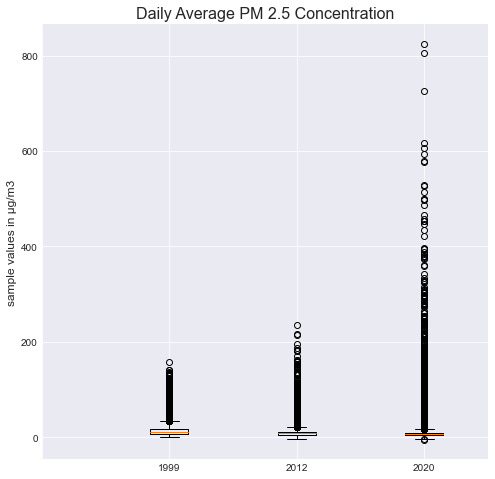

In [29]:
#make boxplots
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = [8, 8]) #make larger

years = [x0, x1, x2]
plt.boxplot(years)
plt.title('Daily Average PM 2.5 Concentration', fontsize=16)
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('sample values in µg/m3', fontsize=12)

In [30]:
plt.close()

Text(0, 0.5, 'sample values in µg/m3')

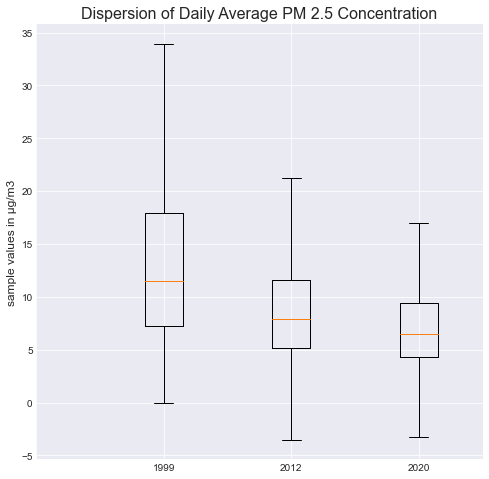

In [31]:
#re-plot arithmetic means for 1999, 2012, and 2020 removing the outliers
fig1 = plt.figure(figsize = [8, 8]) #make larger

years = [x0, x1, x2]
plt.boxplot(years, showfliers = False)
plt.title('Dispersion of Daily Average PM 2.5 Concentration', fontsize=16)
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('sample values in µg/m3', fontsize=12)

In [32]:
plt.close()

Text(0.5, 0, '')

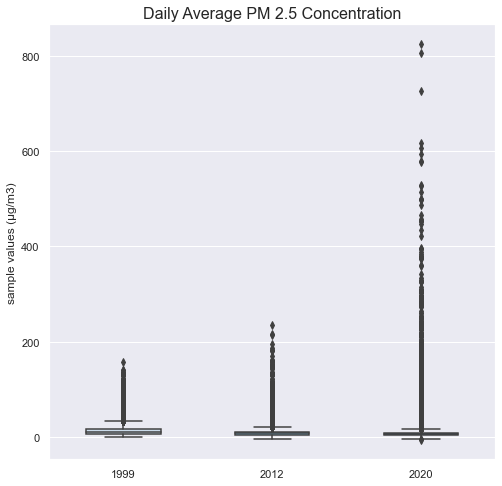

In [33]:
#Use seaborn for boxplots 
#Create separate dataframes for arithmetic year series, add a year column and combine dataframes
#Code modified from https://stackoverflow.com/questions/42004381/box-plot-of-a-many-pandas-dataframes
df0 = pd.DataFrame(x0.to_frame()).assign(Year=1999)
df1 = pd.DataFrame(x1.to_frame()).assign(Year=2012)
df2 = pd.DataFrame(x2.to_frame()).assign(Year=2020)
cdf = pd.concat([df0, df1, df2])
sns.set(rc={'figure.figsize': (8,8)})
ax = sns.boxplot(x="Year", y="Arithmetic Mean", data=cdf, width = 0.5, palette='Blues')  
ax.set_title('Daily Average PM 2.5 Concentration', fontsize=16)
ax.set_ylabel('sample values (µg/m3)')
ax.set_xlabel('')

In [34]:
plt.close()

Text(0.5, 0, '')

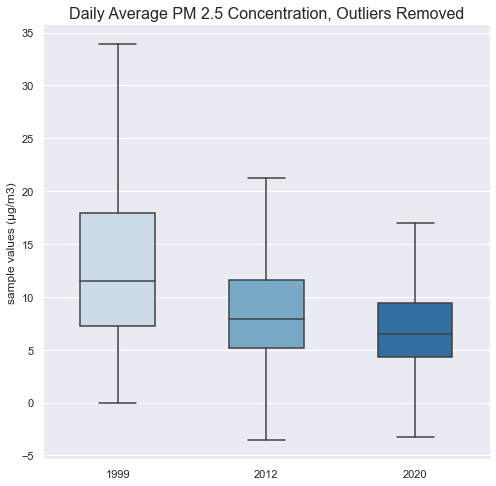

In [35]:
#Use seaborn for boxplots and remove outliers
#Create separate dataframes for arithmetic year series, add a year column and combine dataframes
#Code modified from https://stackoverflow.com/questions/42004381/box-plot-of-a-many-pandas-dataframes
df0 = pd.DataFrame(x0.to_frame()).assign(Year=1999)
df1 = pd.DataFrame(x1.to_frame()).assign(Year=2012)
df2 = pd.DataFrame(x2.to_frame()).assign(Year=2020)
cdf = pd.concat([df0, df1, df2])
sns.set(rc={'figure.figsize': (8,8)})
ax = sns.boxplot(x="Year", y="Arithmetic Mean", data=cdf, width = 0.5, palette='Blues', showfliers = False)  
ax.set_title('Daily Average PM 2.5 Concentration, Outliers Removed', fontsize=16)
ax.set_ylabel('sample values (µg/m3)')
ax.set_xlabel('')

In [36]:
plt.close()

## How have state levels of PM 2.5 changed over time?

In [37]:
#calculate the PM for each state in 1999, 2012, and 2020
mn0 = pm0['Arithmetic Mean'].groupby(pm0['State Code']).mean()
mn1 = pm1Cleaned['Arithmetic Mean'].groupby(pm1Cleaned['State Code']).mean()
mn2 = pm2ReCleaned['Arithmetic Mean'].groupby(pm2ReCleaned['State Code']).mean()

In [38]:
#Make separate data frames for states / years
d0 = pd.DataFrame(mn0.to_frame().reset_index())
d0.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
d1 = pd.DataFrame(mn1.to_frame().reset_index())
d1.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
mrg = pd.merge(d0, d1, on = 'State Code')
#mrg.head(10)

[Text(1, 0, '1999'), Text(3, 0, '2012')]

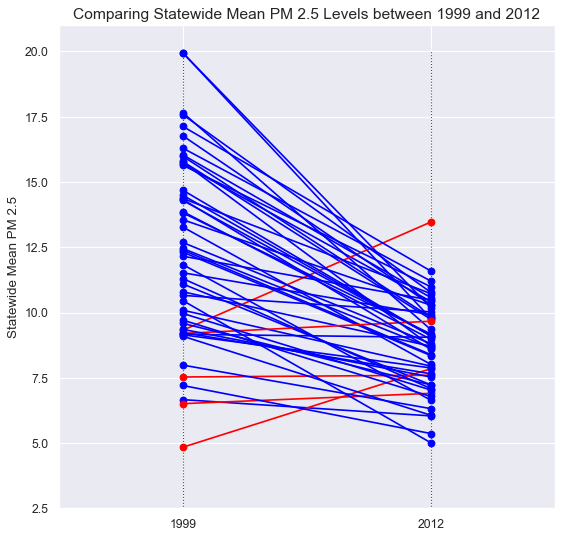

In [39]:
#This is a repeat of the analysis done in PM2.5 studies; however, the 2012 dataset was cleaned in this study
#Code for this plot was modified from slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg['Mean_x'], x=np.repeat(1, mrg.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg['Mean_y'], x=np.repeat(3, mrg.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(mrg['Mean_x'], mrg['Mean_y'], mrg['State Code']):
    newline([1,p1], [3,p2])
    
# Decoration
ax.set_title("Comparing Statewide Mean PM 2.5 Levels between 1999 and 2012", fontsize=14)
ax.set(xlim=(0,4), ylim=(2.5,21), ylabel='Statewide Mean PM 2.5')
ax.set_xticks([1,3])
ax.set_xticklabels(["1999", "2012"])

In [40]:
plt.close()

In [41]:
#Add 2020 dataset and re-plot changes between 2012 and 2020
d2 = pd.DataFrame(mn2.to_frame().reset_index())
d2.rename(columns = {'Arithmetic Mean' : 'Mean'}, inplace = True)
mrg1 = pd.merge(mrg, d2, on = 'State Code')

[Text(1, 0, '2012'), Text(3, 0, '2020')]

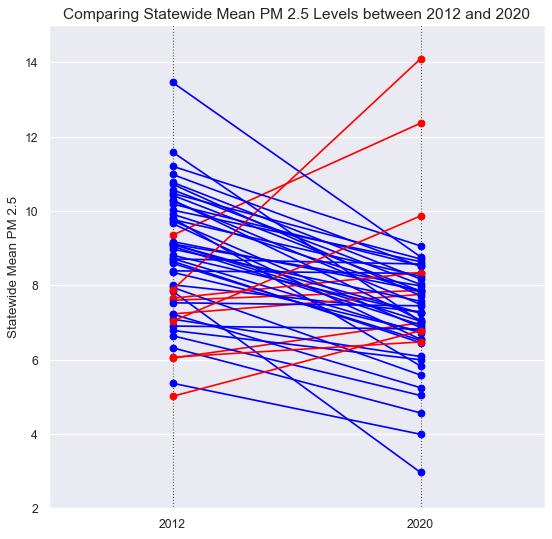

In [42]:
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='blue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(8,8), dpi= 80)

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')



# Points
#ax.scatter(y=mrg1['Mean_x'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['Mean_y'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['Mean'], x=np.repeat(3, mrg1.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip( mrg1['Mean_y'], mrg1['Mean'], mrg1['State Code']):
    newline([1,p1], [3,p2] )
    
# Decoration
ax.set_title("Comparing Statewide Mean PM 2.5 Levels between 2012 and 2020", fontsize=14)
ax.set(xlim=(0,4), ylim=(2,15), ylabel='Statewide Mean PM 2.5')
ax.set_xticks([1,3])
ax.set_xticklabels(['2012', '2020'])

In [43]:
plt.close()

### Which states have the highest levels of PM2.5?

In [44]:
#Need a new datafile from AQS on site information
sites = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Original_datasets\\aqs_sites.csv')
#print(len(sites))
#print(sites.head(5))
#print(sites.info())
#d0

#print(type(d0))

#print(d0.info())
sitesSubset = sites[['State Code', 'State Name']]
sitesStateNames = sitesSubset['State Name'].unique()
sitesStateNames

#remove 'Country Of Mexico' and 'Canada' but leave in Guam, Puerto Rico, and Virgin Islands
cleanedSitesStateNames = np.delete(sitesStateNames, [-2, -1]) #by index
cleanedSitesStateNames

sitesStateCodes = sitesSubset['State Code'].unique()
sitesStateCodes

#remove the last two elements that correspond with Mexico and Canada
cleanedSitesStateCodes = np.delete(sitesStateCodes, [-2, -1]) #by index
cleanedSitesStateCodes

cleanedSites = pd.DataFrame(data = [cleanedSitesStateNames, cleanedSitesStateCodes]).T
cleanedSites.columns = ['State Name', 'State Code']
cleanedSites

cleanedSites['State Code'] = cleanedSites['State Code'].astype(int)
cleanedSites
print(cleanedSites.info())
print(cleanedSites)


d0.info()
d0['State Code'] = d0['State Code'].astype(int)
print(d0.info())
print(d0)

d0merged = d0.merge(cleanedSites, on='State Code', how = 'left')
d0merged

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Name  54 non-null     object
 1   State Code  54 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 776.0+ bytes
None
              State Name  State Code
0                Alabama           1
1                 Alaska           2
2                Arizona           4
3               Arkansas           5
4             California           6
5               Colorado           8
6            Connecticut           9
7               Delaware          10
8   District Of Columbia          11
9                Florida          12
10               Georgia          13
11                Hawaii          15
12                 Idaho          16
13              Illinois          17
14               Indiana          18
15                  Iowa          19
16                Kansas          20
17          

,State Code,Mean,State Name
0,1,19.951238,Alabama
1,2,6.665929,Alaska
2,4,10.795547,Arizona
3,5,15.676067,Arkansas
4,6,17.653481,California
5,8,7.533304,Colorado
6,9,13.276085,Connecticut
7,10,14.492895,Delaware
8,11,15.786507,District Of Columbia
9,12,11.095627,Florida


In [45]:
d0TopTen = d0merged.sort_values('Mean', ascending = False).head(10)
d0TopTen

,State Code,Mean,State Name
0,1,19.951238,Alabama
10,13,19.943240,Georgia
4,6,17.653481,California
34,39,17.578823,Ohio
41,47,17.129217,Tennessee
47,54,16.769652,West Virginia
13,17,16.724550,Illinois
23,28,16.297349,Mississippi
17,21,16.039906,Kentucky
19,24,15.985083,Maryland


Text(0.5, 1.0, '1999 Highest Concentrations of PM 2.5')

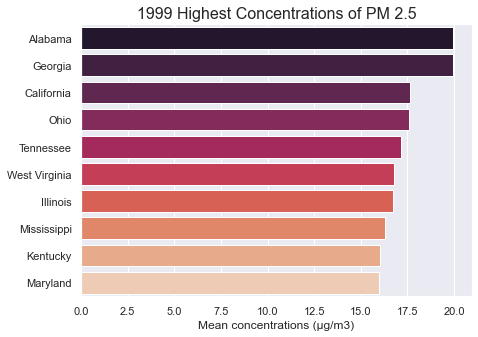

In [46]:
#create barplots
sns.set(rc={'figure.figsize': (7,5)})
sns.barplot(x = d0TopTen['Mean'], y = d0TopTen['State Name'], palette = 'rocket')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('1999 Highest Concentrations of PM 2.5', fontsize=16)

In [47]:
plt.close()

In [48]:
#repeat top ten visualizations for years 2012 and 2020
d1['State Code'] = d1['State Code'].astype(int)
d1merged = d1.merge(cleanedSites, on='State Code', how = 'left')
d1TopTen = d1merged.sort_values('Mean', ascending = False).head(10)
d1TopTen

,State Code,Mean,State Name
12,16,13.464291,Idaho
40,47,11.590931,Tennessee
22,28,11.207692,Mississippi
13,18,10.987102,Indiana
33,39,10.775360,Ohio
36,42,10.724850,Pennsylvania
16,21,10.573842,Kentucky
41,48,10.477064,Texas
3,5,10.427459,Arkansas
46,54,10.301948,West Virginia


Text(0.5, 1.0, '2012 Highest Concentrations of PM 2.5')

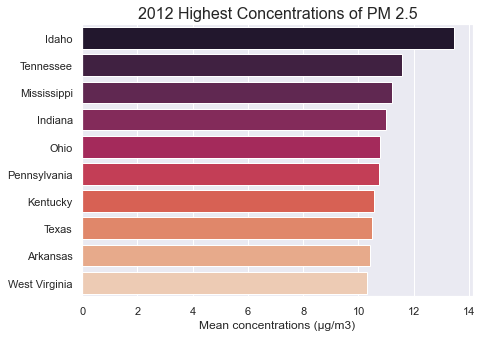

In [49]:
sns.barplot(x = d1TopTen['Mean'], y = d1TopTen['State Name'], palette = 'rocket')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('2012 Highest Concentrations of PM 2.5', fontsize=16)

In [50]:
plt.close()

In [51]:
d2['State Code'] = d2['State Code'].astype(int)
d2merged = d2.merge(cleanedSites, on='State Code', how = 'left')
d2TopTen = d2merged.sort_values('Mean', ascending = False).head(10)
d2TopTen

,State Code,Mean,State Name
37,41,14.096686,Oregon
4,6,12.364399,California
47,53,9.867813,Washington
24,28,9.063922,Mississippi
12,16,8.768651,Idaho
43,48,8.712135,Texas
36,40,8.639519,Oklahoma
13,17,8.626991,Illinois
2,4,8.575415,Arizona
10,13,8.529172,Georgia


Text(0.5, 1.0, '2020 Highest Concentrations of PM 2.5')

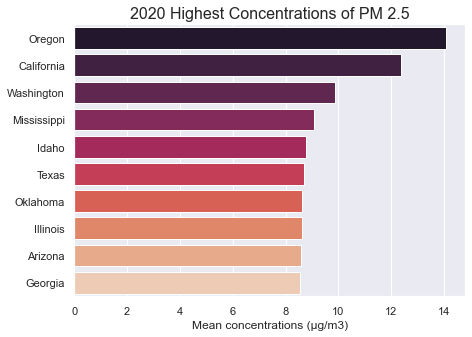

In [52]:
sns.barplot(x = d2TopTen['Mean'], y = d2TopTen['State Name'], palette = 'rocket')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('2020 Highest Concentrations of PM 2.5', fontsize=16)

In [53]:
plt.close()

### Which states have the lowest levels of PM2.5?

Text(0.5, 1.0, '1999 Lowest Concentrations of PM 2.5')

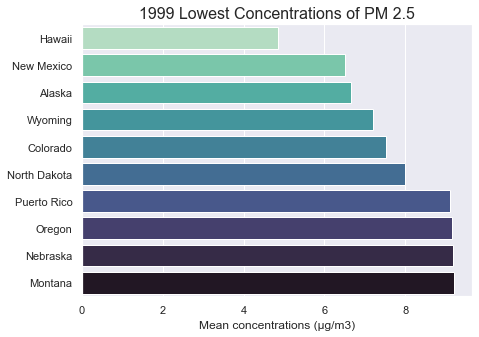

In [54]:
d0LowestTen = d0merged.sort_values('Mean').head(10)
sns.barplot(x = d0LowestTen['Mean'], y = d0LowestTen['State Name'], palette = 'mako_r')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('1999 Lowest Concentrations of PM 2.5', fontsize=16)

In [55]:
plt.close()

Text(0.5, 1.0, '2012 Lowest Concentrations of PM 2.5')

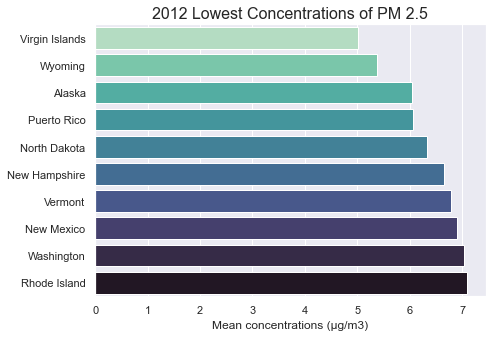

In [56]:
d1LowestTen = d1merged.sort_values('Mean').head(10)
sns.barplot(x = d1LowestTen['Mean'], y = d1LowestTen['State Name'], palette = 'mako_r')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('2012 Lowest Concentrations of PM 2.5', fontsize=16)

In [57]:
plt.close()

Text(0.5, 1.0, '2020 Lowest Concentrations of PM 2.5')

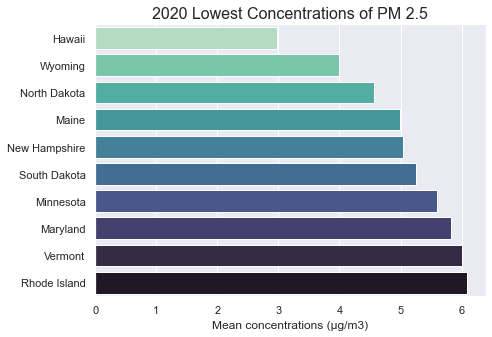

In [58]:
d2LowestTen = d2merged.sort_values('Mean').head(10)
sns.barplot(x = d2LowestTen['Mean'], y = d2LowestTen['State Name'], palette = 'mako_r')
plt.xlabel('Mean concentrations (µg/m3)') 
plt.ylabel('') 
plt.title('2020 Lowest Concentrations of PM 2.5', fontsize=16)

In [59]:
plt.close()

### End PM2.5 studies